In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_red = pd.read_csv("winequality-red.csv")

In [25]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Let's start with some basic, multiple linear regression

Mean Squared Error (MSE): 0.39
R-squared (R²): 0.40


Text(0, 0.5, 'actual quality')

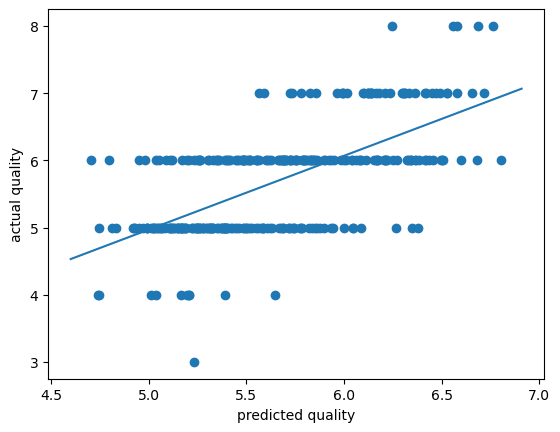

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress

df = df_red

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

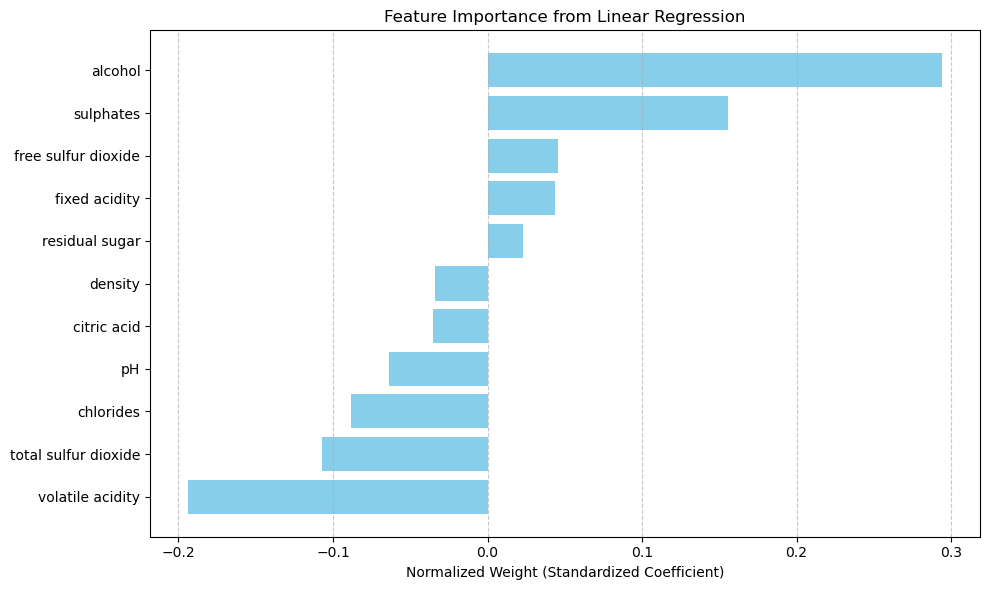

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})



import matplotlib.pyplot as plt

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [28]:
df_white = pd.read_csv("winequality-white.csv")

In [29]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Mean Squared Error (MSE): 0.57
R-squared (R²): 0.27


Text(0, 0.5, 'actual quality')

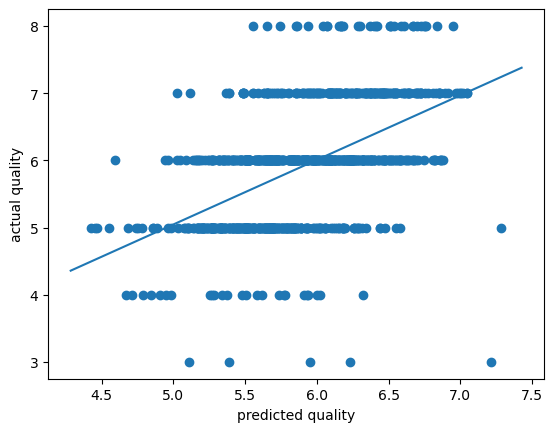

In [30]:
df = df_white

# Step 1: Separate features (X) and target (y)
X = df.iloc[:, :-1]   # All columns except the last one
y = df.iloc[:, -1]    # The last column (quality)

# Step 2: Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

f,ax = plt.subplots(1,1)
ax.scatter(y_pred, y_test)
x = np.array(ax.get_xlim())

linfit = linregress(y_pred, y_test)
ax.plot(x,x*linfit.slope + linfit.intercept)

ax.set_xlabel("predicted quality")
ax.set_ylabel("actual quality")

                 Feature  Normalized Weight
3         residual sugar           0.413243
10               alcohol           0.238071
8                     pH           0.103628
9              sulphates           0.072060
5    free sulfur dioxide           0.063477
0          fixed acidity           0.055285
2            citric acid           0.002673
4              chlorides          -0.005402
6   total sulfur dioxide          -0.012142
1       volatile acidity          -0.187779
7                density          -0.449440


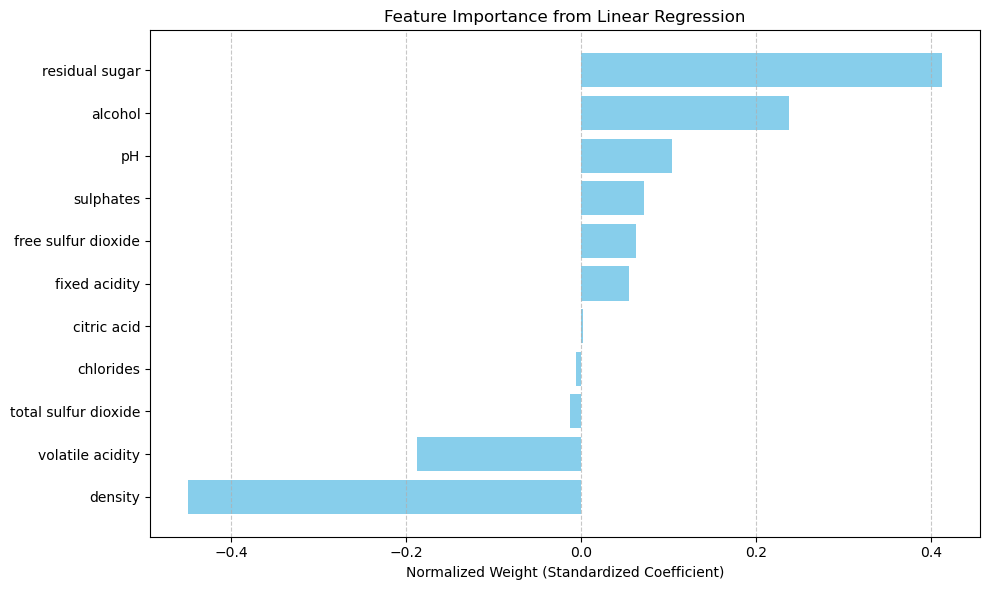

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression on standardized features
model = LinearRegression()
model.fit(X_scaled, y)

# Get normalized (standardized) coefficients
normalized_weights = pd.DataFrame({
    'Feature': X.columns,
    'Normalized Weight': model.coef_
})

# Display results
print(normalized_weights.sort_values(by='Normalized Weight', ascending=False))

# Sort features by absolute weight (optional but useful for visualization)
normalized_weights['Abs Weight'] = normalized_weights['Normalized Weight']
normalized_weights_sorted = normalized_weights.sort_values(by='Abs Weight', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(normalized_weights_sorted['Feature'], normalized_weights_sorted['Normalized Weight'], color='skyblue')
plt.xlabel('Normalized Weight (Standardized Coefficient)')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()  # Most important on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [32]:
# Load datasets
df_red = pd.read_csv("winequality-red.csv")
df_white = pd.read_csv("winequality-white.csv")

# Add label column
df_red['wine_type'] = 0  # Red = 0
df_white['wine_type'] = 1  # White = 1

# Combine datasets
df_combined = pd.concat([df_red, df_white], ignore_index=True)

X = df_combined.drop('wine_type', axis=1)
y = df_combined['wine_type']



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [34]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[333   8]
 [  6 953]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       341
           1       0.99      0.99      0.99       959

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



In [35]:
# Coefficients: which features help distinguish red vs white
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Weight': model.coef_[0]
}).sort_values(by='Weight', key=abs, ascending=False)

print(feature_importance)


                 Feature    Weight
3         residual sugar  3.306167
7                density -3.116802
6   total sulfur dioxide  2.988387
1       volatile acidity -1.489644
4              chlorides -0.932399
10               alcohol -0.893930
5    free sulfur dioxide -0.891045
9              sulphates -0.758793
0          fixed acidity -0.606350
8                     pH -0.392075
2            citric acid  0.335820
11               quality -0.301135


In [147]:
X_test.shape

(1300, 12)

In [145]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy

model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(X_test, y_test, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7355 - loss: 0.5860 - precision_3: 0.7355 - recall_3: 1.0000 - val_accuracy: 0.7538 - val_loss: 0.5570 - val_precision_3: 0.7538 - val_recall_3: 1.0000
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7423 - loss: 0.5667 - precision_3: 0.7423 - recall_3: 1.0000 - val_accuracy: 0.7538 - val_loss: 0.5453 - val_precision_3: 0.7538 - val_recall_3: 1.0000
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7124 - loss: 0.5834 - precision_3: 0.7124 - recall_3: 1.0000 - val_accuracy: 0.7538 - val_loss: 0.5317 - val_precision_3: 0.7538 - val_recall_3: 1.0000
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7370 - loss: 0.5470 - precision_3: 0.7370 - recall_3: 1.0000 - val_accuracy: 0.7538 - val_loss: 0.5143 - val_precision_3: 0.7538 - val_recall_3: 1.0000
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7398 - loss: 0.5253 - precision_3: 0.7398 - recall_3: 1.0000 - val_accur

In [141]:
y_pred = model.predict(X_train)

correct_red = np.sum(np.array(y_train)*y_pred[:,0].round())
total_red = np.sum(y_train)

correct_white = np.sum(np.array(1-y_train)*(1-y_pred)[:,0].round())
total_white = np.sum(1-y_train)

print(f"correctly labelled red wines: {correct_red} out of {total_red}")
print(f"correctly labelled white wines: {correct_white} out of {np.sum(total_white)}")

163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 592us/step
correctly labelled red wines: 3931.0 out of 3939
correctly labelled white wines: 1159.0 out of 1258


In [150]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9903 - loss: 0.1047 - precision_3: 0.9975 - recall_3: 0.9893


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - loss: 0.6898
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - loss: 0.6377
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.5833
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
Epoch 1/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.6401
Epoch 2/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 0.5824
Epoch 3/3
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.5443
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
Epoch 1/4
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 1.3874
Epoch 2/4
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 1.1303
Epoch 3/4
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.9727
Epoch 4/4
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.8371
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - loss: 0.8004
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.7112
Epo

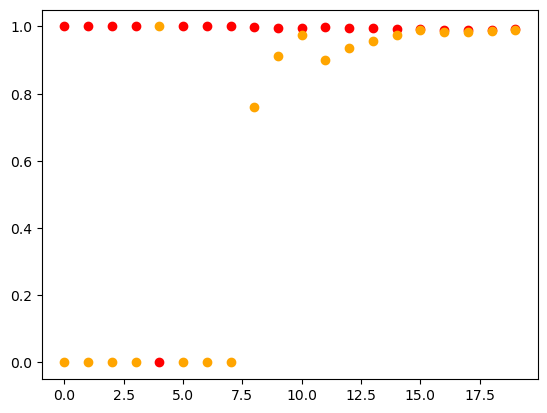

In [139]:
f,ax = plt.subplots(1,1)

for i in range(20):
    model = Sequential([
    Dense(units=12, activation="sigmoid"),
    Dense(units=6, activation="sigmoid"),
    Dense(units=1, activation="sigmoid"),
    ])

    model.compile(loss=BinaryCrossentropy())

    model.fit(X_test, y_test, epochs=i)
    y_pred = model.predict(X_train)

    correct_red = np.sum(np.array(y_train)*y_pred[:,0].round())
    total_red = np.sum(y_train)

    correct_white = np.sum(np.array(1-y_train)*(1-y_pred)[:,0].round())
    total_white = np.sum(1-y_train)

    ax.scatter(i, correct_red/total_red, marker="o", color="red")
    ax.scatter(i, correct_white/total_white, marker="o", color="orange")

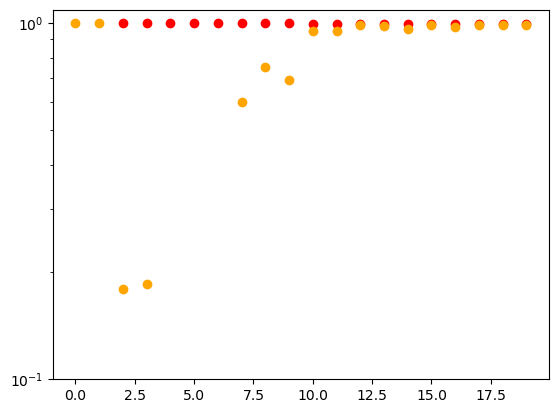

In [131]:
ax.semilogy()
ax.set_ylim([.1,ax.get_ylim()[1]])
f

In [153]:
X_test.shape

(1300, 12)

In [199]:
X = df_white.drop('wine_type', axis=1).drop('quality', axis=1)
y = df_white['quality']

In [200]:
# Optional: Standardize features for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [215]:
from keras.losses import MeanSquaredError

# model = Sequential([
#     Dense(units=15, activation="relu"),
#     Dense(units=10, activation="relu"),
#     Dense(units=5, activation="relu"),
#     Dense(units=1, activation="relu"),
# ])

model = Sequential([
    Dense(units=15, activation=None),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=1, activation="relu"),
])


model.compile(optimizer='adam', loss=MeanSquaredError())

model.fit(X_test, y_test, epochs=250)


Epoch 1/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - loss: 14.6335 
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 8.9310
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 6.9860  
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 4.8673
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 3.8651
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 3.3253
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 3.1402
Epoch 8/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 2.5499
Epoch 9/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 2.5180
Epoch 10/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 2.2373 
Epoch 11/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 2.1790
Epoch 12/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - loss: 2.0961 
Epoch 13/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 2.0502
Epoch 14/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 1.5523
Epoch 15/250
31/31 ━━━━━━━━━━━━━━━━━━

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step


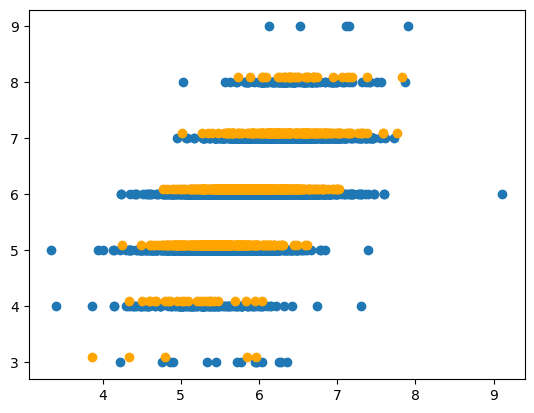

In [216]:
f,ax = plt.subplots(1,1)
ax.scatter(model.predict(X_train), y_train, )
ax.scatter( model.predict(X_test), y_test+.1,color="orange")

In [235]:
from keras.losses import SparseCategoricalCrossentropy

model = Sequential([
    Dense(units=15, activation="relu"),
    Dense(units=10, activation="relu"),
    Dense(units=5, activation="relu"),
    Dense(units=10, activation="linear"),
])


model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True))

model.fit(X_test, y_test, epochs=250)


Epoch 1/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - loss: 2.3992
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - loss: 2.2402
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 2.0955
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 1.9614
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 1.8063
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 1.5822
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.4301
Epoch 8/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 1.3224
Epoch 9/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 1.2589
Epoch 10/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 1.2465
Epoch 11/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 1.2435
Epoch 12/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 1.1767
Epoch 13/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 1.1599
Epoch 14/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 1.1452
Epoch 15/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [236]:
logits = model(X_train)
f_x = tf.nn.softmax(logits)
print(f_x.shape, y_train.shape)

(3918, 10) (3918,)


### the below is not a great way of visualising the skill of the model

TypeError: Cannot interpret '10' as a data type

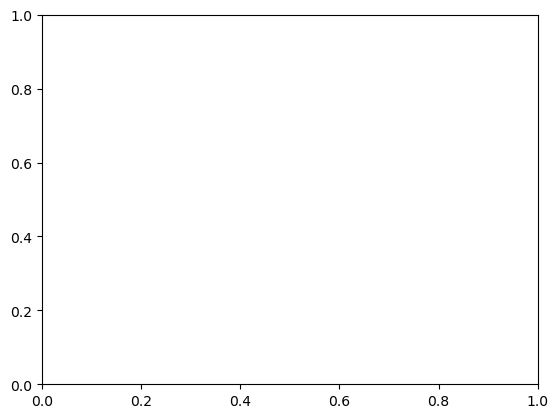

In [ ]:
f,ax = plt.subplots(1,1)


c = np.zeros((10,10))
